In [1]:
import numpy as np
from blimpy import read_header, Waterfall, Filterbank

%matplotlib inline
import matplotlib.pyplot as plt

import sys, os, glob
sys.path.append("../../setigen")
import setigen as stg

In [2]:
tsamp = 18.253611008
fch1 = 6095.214842353016
df = -2.7939677238464355e-06

fchans = 1024
tchans = 16

fs = np.arange(fch1, fch1 + fchans*df, df)
ts = np.arange(0, tchans*tsamp, tsamp)

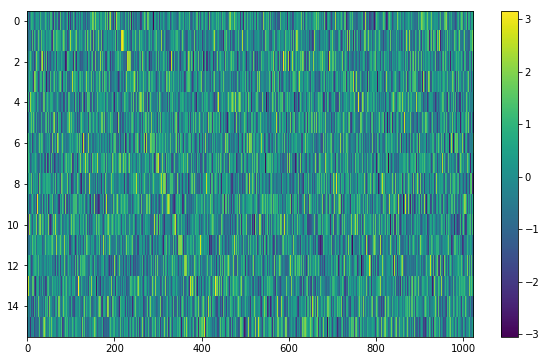

In [3]:
signal = stg.generate(ts,
                          fs,
                          stg.constant_path(f_start = fs[200], drift_rate = -0.000002),
                          stg.constant_t_profile(level = 2.0),
                          stg.box_f_profile(width = 0.00001),
                          stg.constant_bp_profile(level = 1.0))

fig = plt.figure(figsize=(10,6))
plt.imshow(stg.normalize(stg.inject_noise(signal)), aspect='auto')
plt.colorbar()

568 -5.188879445642134e-07 5


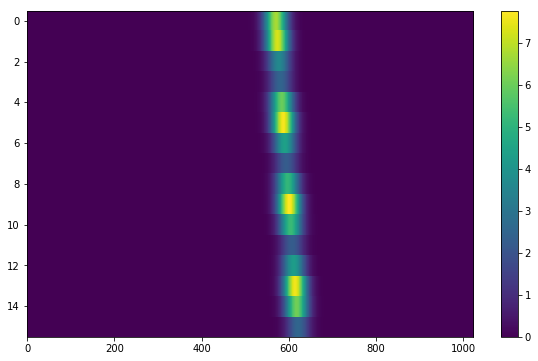

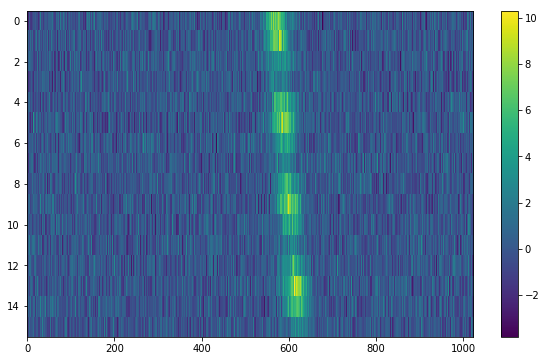

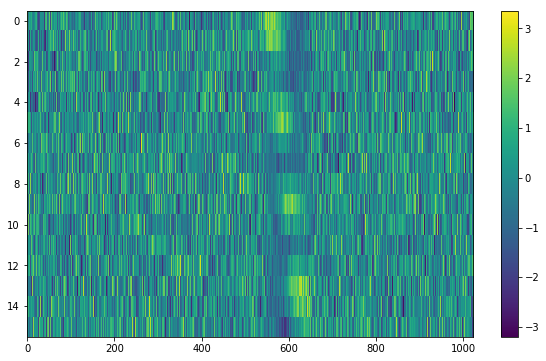

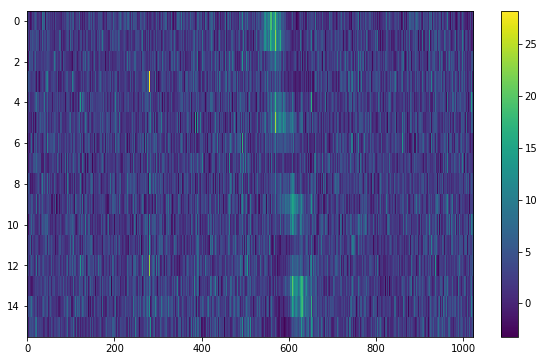

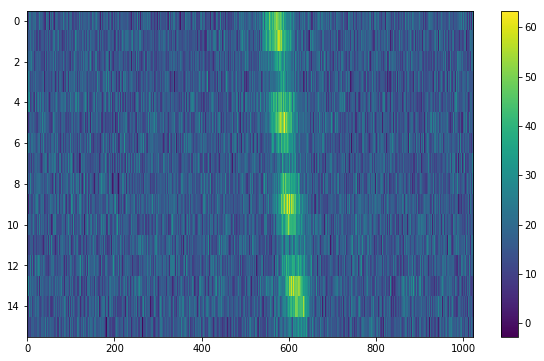

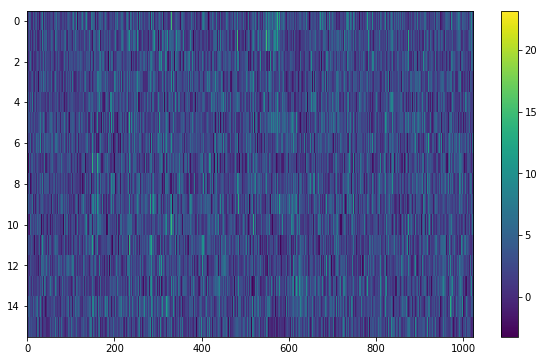

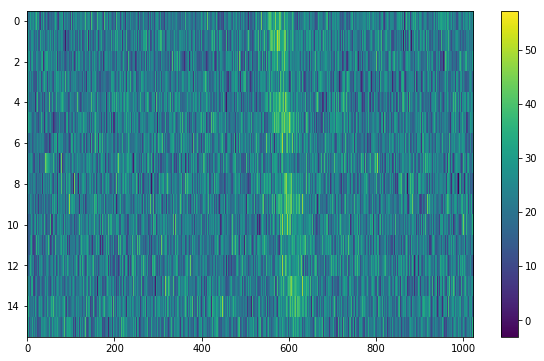

In [5]:
factor = 1
tsamp = 18.253611008 / factor
fch1 = 6095.214842353016
df = -2.7939677238464355e-06

fchans = 1024
tchans = 16 * factor

fs = np.arange(fch1, fch1 + fchans*df, df)
ts = np.arange(0, tchans*tsamp, tsamp)

start_index = np.random.randint(0,fchans)
drift_rate = np.random.uniform(-start_index*df/(tsamp*tchans),
                               (fchans-1-start_index)*df/(tsamp*tchans))
#drift_rate = 0
level = np.random.uniform(2, 5)
level = 5
amplitude = np.random.uniform(level/4, level)
# amplitude = level
period = np.random.uniform(50, 100)
# width = np.random.uniform(0.000009, 0.000225)
width = np.random.uniform(0.02, 0.05) ** 3

signal = stg.generate(ts,
                          fs,
                          stg.constant_path(f_start = fs[start_index], drift_rate = drift_rate),
                          stg.sine_t_profile(period = period,
                                             phase = 0,
                                             amplitude = amplitude,
                                             level = level),
                          stg.gaussian_f_profile(width = width),
                          stg.constant_bp_profile(level = 1.0),
                          integrate=True)

fig = plt.figure(figsize=(10,6))
plt.imshow(signal, aspect='auto')
plt.colorbar()

fig = plt.figure(figsize=(10,6))
plt.imshow(stg.inject_noise(signal), aspect='auto')
# plt.imshow(stg.normalize(stg.inject_noise(signal), cols = 0, exclude = 0.0, use_median=False), aspect='auto')
plt.colorbar()
# plt.imshow(signal)

fig = plt.figure(figsize=(10,6))
# plt.imshow(stg.inject_noise(signal), aspect='auto')
plt.imshow(stg.normalize(stg.inject_noise(signal), cols = 0, exclude = 0.0, use_median=False), aspect='auto')
plt.colorbar()

fig = plt.figure(figsize=(10,6))
# plt.imshow(stg.inject_noise(signal), aspect='auto')
plt.imshow(stg.normalize(stg.inject_noise(signal), cols = 1, exclude = 0.2, use_median=False), aspect='auto')
plt.colorbar()

fig = plt.figure(figsize=(10,6))
# plt.imshow(stg.inject_noise(signal), aspect='auto')
plt.imshow(stg.normalize(stg.inject_noise(signal), cols = 1024, exclude = 0.0, use_median=False), aspect='auto')
plt.colorbar()

fig = plt.figure(figsize=(10,6))
# plt.imshow(stg.inject_noise(signal), aspect='auto')
plt.imshow(stg.normalize(stg.inject_noise(signal, noise_sigma = 3), cols = 1, exclude = 0.2, use_median=False), aspect='auto')
plt.colorbar()

fig = plt.figure(figsize=(10,6))
# plt.imshow(stg.inject_noise(signal), aspect='auto')
plt.imshow(stg.normalize(stg.inject_noise(signal, noise_sigma = 3), cols = 1024, exclude = 0.0, use_median=False), aspect='auto')
plt.colorbar()

# normalized_signal = stg.normalize(stg.inject_noise(signal))
# plt.imsave('test_none.png', normalized_signal)
print(start_index, drift_rate, level)

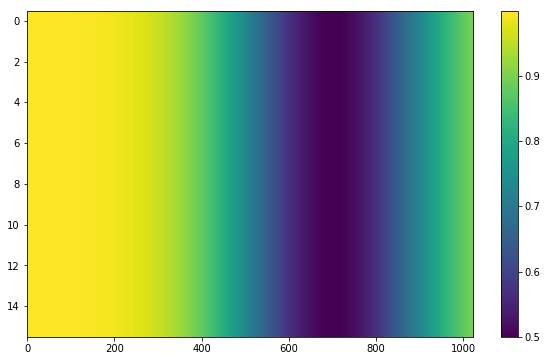

In [6]:
block = stg.generate(ts,
                          fs,
                          stg.constant_path(f_start = fs[700], drift_rate = 0),
                          stg.constant_t_profile(1),
                          stg.gaussian_f_profile(width = 0.0005),
                          stg.constant_bp_profile(level = 1.0),
                          integrate=True)

fig = plt.figure(figsize=(10,6))
plt.imshow((1-block/2), aspect='auto')
plt.colorbar()

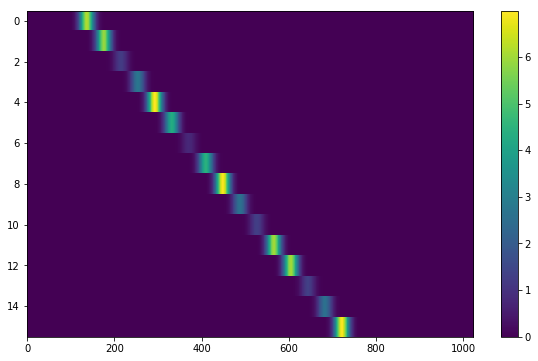

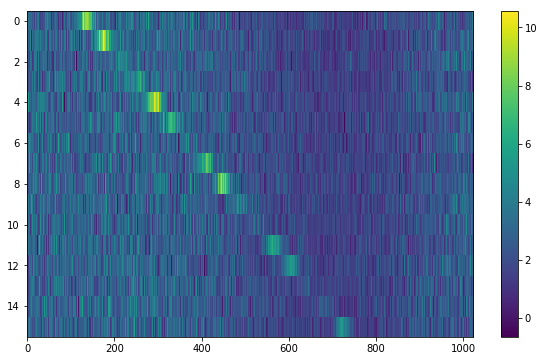

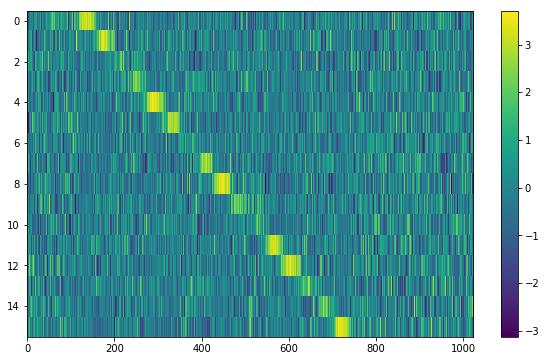

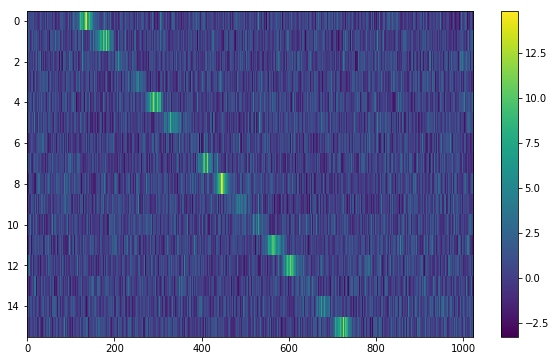

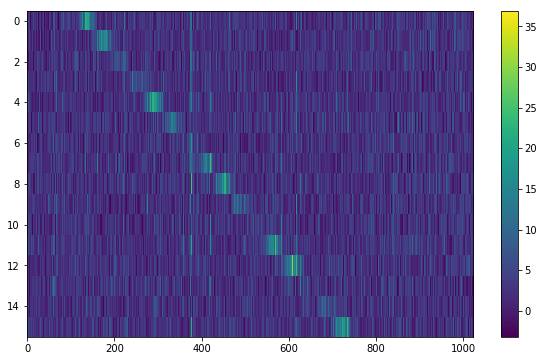

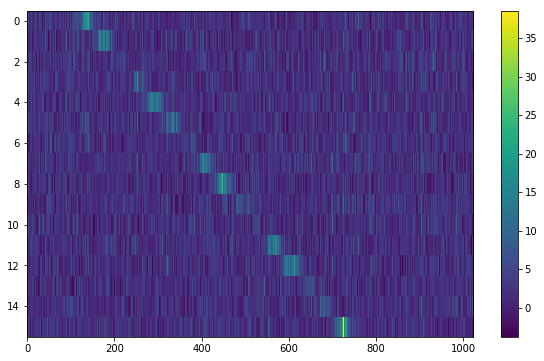

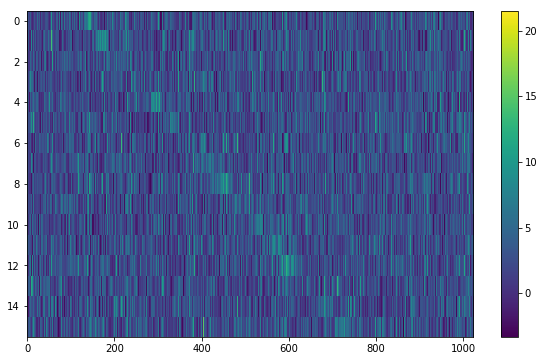

In [31]:
start_index = np.random.randint(0,fchans)
drift_rate = np.random.uniform(-start_index*df/(tsamp*tchans),
                               (fchans-1-start_index)*df/(tsamp*tchans))
#drift_rate = 0
level = np.random.uniform(2, 5)
amplitude = np.random.uniform(level/4, level)
# amplitude = level
period = np.random.uniform(50, 100)
# width = np.random.uniform(0.000009, 0.000225)
width = np.random.uniform(0.02, 0.05) ** 3

signal = stg.generate(ts,
                          fs,
                          stg.constant_path(f_start = fs[start_index], drift_rate = drift_rate),
                          stg.sine_t_profile(period = period,
                                             phase = 0,
                                             amplitude = amplitude,
                                             level = level),
                          stg.gaussian_f_profile(width = width),
                          stg.constant_bp_profile(level = 1.0),
                          integrate=True)

fig = plt.figure(figsize=(10,6))
plt.imshow(signal, aspect='auto')
plt.colorbar()

fig = plt.figure(figsize=(10,6))
plt.imshow((1-block/2)*(3+stg.inject_noise(signal)), aspect='auto')
# plt.imshow(stg.normalize(stg.inject_noise(signal), cols = 0, exclude = 0.0, use_median=False), aspect='auto')
plt.colorbar()
# plt.imshow(signal)

fig = plt.figure(figsize=(10,6))
# plt.imshow(stg.inject_noise(signal), aspect='auto')
plt.imshow(stg.normalize((1-block/2)*(3+stg.inject_noise(signal)), cols = 0, exclude = 0.0, use_median=False), aspect='auto')
plt.colorbar()

fig = plt.figure(figsize=(10,6))
# plt.imshow(stg.inject_noise(signal), aspect='auto')
plt.imshow(stg.normalize((1-block/2)*(3+stg.inject_noise(signal)), cols = 0, exclude = 0.2, use_median=False), aspect='auto')
plt.colorbar()

fig = plt.figure(figsize=(10,6))
# plt.imshow(stg.inject_noise(signal), aspect='auto')
plt.imshow(stg.normalize((1-block/2)*(3+stg.inject_noise(signal)), cols = 1, exclude = 0.2, use_median=False), aspect='auto')
plt.colorbar()

fig = plt.figure(figsize=(10,6))
# plt.imshow(stg.inject_noise(signal), aspect='auto')
plt.imshow(stg.normalize((1-block/2)*(3+stg.inject_noise(signal)), cols = 1, exclude = 0.0, use_median=False), aspect='auto')
plt.colorbar()

fig = plt.figure(figsize=(10,6))
# plt.imshow(stg.inject_noise(signal), aspect='auto')
plt.imshow(stg.normalize((1-block/2)*(3+stg.inject_noise(signal, noise_sigma = 3)), cols = 1, exclude = 0.2, use_median=False), aspect='auto')
plt.colorbar()


In [57]:
np.abs(4000 / ( 1024 * df))

1398101.3333333333

366 3.3494408454355773e-06 4.349827058029806


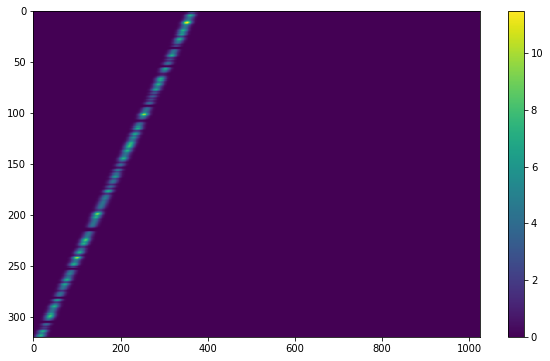

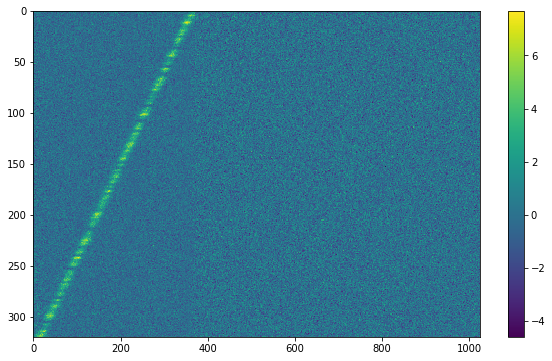

In [48]:
factor = 20
tsamp = 18.253611008 / factor
fch1 = 6095.214842353016
df = -2.7939677238464355e-06

fchans = 1024
tchans = 16 * factor

fs = np.arange(fch1, fch1 + fchans*df, df)
ts = np.arange(0, tchans*tsamp, tsamp)

start_index = np.random.randint(0,fchans)
drift_rate = np.random.uniform(-start_index*df/(tsamp*tchans),
                               (fchans-1-start_index)*df/(tsamp*tchans))
#drift_rate = 0
level = np.random.uniform(2,5)
period = np.random.uniform(2,4)
phase = np.random.uniform(0,period)
sigma = np.random.uniform(0.1, 2)
pulse_dir = 'rand'
width = np.random.uniform(np.random.uniform(0.1,2))
pnum = 10
amplitude = np.random.uniform(min(1, level/2.), level)

# level = 0.5
# period = 2
# phase = 0
# sigma = 2
# pulse_dir = 'rand'
# width = 2
# pnum = 10
# amplitude = 0.5

signal = stg.generate(ts,
                          fs,
                          stg.constant_path(f_start = fs[start_index], drift_rate = drift_rate),
                          stg.periodic_gaussian_t_profile(period, phase, sigma, pulse_dir, width, pnum, amplitude, level),
                          stg.gaussian_f_profile(width = 0.00002),
                          stg.constant_bp_profile(level = 1.0),
                          integrate = True)

fig = plt.figure(figsize=(10,6))
plt.imshow(signal, aspect='auto')
plt.colorbar()
fig = plt.figure(figsize=(10,6))
# plt.imshow(stg.inject_noise(signal), aspect='auto')
plt.imshow(stg.normalize(stg.inject_noise(signal), cols = 0, exclude = 0.0, use_median=False), aspect='auto')
plt.colorbar()
# plt.imshow(signal)

# normalized_signal = stg.normalize(stg.inject_noise(signal))
# plt.imsave('test_none.png', normalized_signal)
print(start_index, drift_rate, level)

In [124]:
import errno
dir = 'normalized_comparison'
sets = ['raw', 'normalized', 'normalized_excluded']
for set in sets:
    # labels = ['pulsed_nonzero', 'pulsed_zero', 'constant_nonzero', 'constant_zero', 'noise']
    labels = ['pulsed', 'constant', 'noise']
    dirs = ['/datax/scratch/bbrzycki/data/%s/%s/train/%s/' % (dir, set, label) for label in labels] \
            + ['/datax/scratch/bbrzycki/data/%s/%s/validation/%s/' % (dir, set, label) for label in labels] 

    for d in dirs:
        try:
            os.makedirs(d)
        except OSError as e:
            if e.errno != errno.EEXIST:
                raise

In [112]:
# Generate training and validation data!
datasets = [('train', 5000), ('validation', 500)]

for set in sets:
    for name, num in datasets:

        for i in range(num):

            output_fn = '/datax/scratch/bbrzycki/data/%s/%s/%s/%s/%s_%04d.png' % (dir,set,name,'pulsed','pulsed',i)

            start_index = np.random.randint(0,fchans)
            drift_rate = np.random.uniform(-start_index*df/(tsamp*tchans),
                                           (fchans-1-start_index)*df/(tsamp*tchans))
            #drift_rate = 0
            level = np.random.uniform(2, 5)
            width = np.random.uniform(0.02, 0.05) ** 3
            
            amplitude = np.random.uniform(level/4, level)
            # amplitude = level
            period = np.random.uniform(50, 100)
            # width = np.random.uniform(0.000009, 0.000225)
            

            signal = stg.generate(ts,
                                      fs,
                                      stg.constant_path(f_start = fs[start_index], drift_rate = drift_rate),
                                      stg.sine_t_profile(period = period,
                                                         phase = 0,
                                                         amplitude = amplitude,
                                                         level = level),
                                      stg.gaussian_f_profile(width = width),
                                      stg.constant_bp_profile(level = 1.0))

            if set == 'raw':
                signal = signal
            elif set == 'normalized':
                signal = stg.normalize(stg.inject_noise(signal), cols = 0, exclude = 0.0, use_median=False)
            elif set == 'normalized_excluded':
                signal = stg.normalize(stg.inject_noise(signal), cols = 1, exclude = 0.2, use_median=False)

            plt.imsave(output_fn, signal)
            print('Saved %s of %s pulsed data for %s, set %s' % (i, num, name, set))

        for i in range(num):

            output_fn = '/datax/scratch/bbrzycki/data/%s/%s/%s/%s/%s_%04d.png' % (dir,set,name,'constant','constant',i)

            start_index = np.random.randint(0,fchans)
            drift_rate = np.random.uniform(-start_index*df/(tsamp*tchans),
                                           (fchans-1-start_index)*df/(tsamp*tchans))
            level = np.random.uniform(2, 5)
            width = np.random.uniform(0.02, 0.05) ** 3

            signal = stg.generate(ts,
                                      fs,
                                      stg.constant_path(f_start = fs[start_index], drift_rate = drift_rate),
                                      stg.constant_t_profile(level = level),
                                      stg.gaussian_f_profile(width = width),
                                      stg.constant_bp_profile(level = 1.0))

            if set == 'raw':
                signal = signal
            elif set == 'normalized':
                signal = stg.normalize(stg.inject_noise(signal), cols = 0, exclude = 0.0, use_median=False)
            elif set == 'normalized_excluded':
                signal = stg.normalize(stg.inject_noise(signal), cols = 1, exclude = 0.2, use_median=False)

            plt.imsave(output_fn, signal)
            print('Saved %s of %s constant data for %s, set %s' % (i, num, name, set))

        for i in range(num):

            output_fn = '/datax/scratch/bbrzycki/data/%s/%s/%s/%s/%s_%04d.png' % (dir,set,name,'noise','noise',i)

            # level = 0 for no signal
            signal = stg.generate(ts,
                                      fs,
                                      stg.constant_path(f_start = fs[0], drift_rate = 0),
                                      stg.constant_t_profile(level = 0),
                                      stg.gaussian_f_profile(width = 0.00002),
                                      stg.constant_bp_profile(level = 1.0))

            if set == 'raw':
                signal = signal
            elif set == 'normalized':
                signal = stg.normalize(stg.inject_noise(signal), cols = 0, exclude = 0.0, use_median=False)
            elif set == 'normalized_excluded':
                signal = stg.normalize(stg.inject_noise(signal), cols = 1, exclude = 0.2, use_median=False)

            plt.imsave(output_fn, signal)
            print('Saved %s of %s noise data for %s, set %s' % (i, num, name, set))

Saved 0 of 2000 pulsed data for train
Saved 1 of 2000 pulsed data for train
Saved 2 of 2000 pulsed data for train
Saved 3 of 2000 pulsed data for train
Saved 4 of 2000 pulsed data for train
Saved 5 of 2000 pulsed data for train
Saved 6 of 2000 pulsed data for train
Saved 7 of 2000 pulsed data for train
Saved 8 of 2000 pulsed data for train
Saved 9 of 2000 pulsed data for train
Saved 10 of 2000 pulsed data for train
Saved 11 of 2000 pulsed data for train
Saved 12 of 2000 pulsed data for train
Saved 13 of 2000 pulsed data for train
Saved 14 of 2000 pulsed data for train
Saved 15 of 2000 pulsed data for train
Saved 16 of 2000 pulsed data for train
Saved 17 of 2000 pulsed data for train
Saved 18 of 2000 pulsed data for train
Saved 19 of 2000 pulsed data for train
Saved 20 of 2000 pulsed data for train
Saved 21 of 2000 pulsed data for train
Saved 22 of 2000 pulsed data for train
Saved 23 of 2000 pulsed data for train
Saved 24 of 2000 pulsed data for train
Saved 25 of 2000 pulsed data for tr